# Proyek Analisis Data: Bike Sharing Dataset


*   Name : Gibran Ariq Natakusuma
*   Email :  gibranariq15@gmail.com
*   Dicoding ID : gibranariq




# Menentukan Pertanyaan Bisnis



*   Bagaimana pengaruh cuaca di setiap jamnya terhadap peminatan sewa sepeda?
*   Apa musim utama yang menjadi musim dengan peminatan sewa sepeda tertinggi? (Spring, Summer, Fall, dan Winter)
*   Bagaimana hubungan antara pengguna registered dan casual dalam penggunaan saat weekday, holiday, dan workingday?
*   Apakah temperatur berpengaruh terhadap pengunaan sepeda pada jam-jam tertentu?








# Menyiapkan Semua Library yang Dibutuhkan

In [209]:
# Melakukan import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data Wrangling

## Gathering Data

Import dan membaca data day.csv dan hour.csv dari dataset Bike Sharing

In [210]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

In [211]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [212]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

**`Menilai Tabel day_df dan hour_df`**

In [213]:
# Mengecek data type dari day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [214]:
# Mengecek data type dari hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan data df_day di atas dapat dilihat bahwa terdapat satu kesalahan data type pada kolom dteday. Kolom dteday seharusnya bertipe data datetime

In [215]:
# Mengecek missing value pada day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [216]:
# Mengecek missing value pada hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hasil oberservasi missing value dari data day_df dan hour_df tidak ditemukan adanya missing value atau nilai yang hilang.

In [217]:
# Mengecek data duplikat pada day_df dan melihat parameter statitik
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [218]:
# Mengecek data duplikat pada hour_df dan melihat parameter statitik
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari pemeriksaan data duplikat tidak ditemukan adanya data duplikat dari data day_df dan hour_df

## Cleaning Data

**`Memperbaiki Data Type`**

Mengubah nama-nama kolom yang masih ambigu agar data lebih mudah untuk dipahami dan dikelola

In [219]:
day_df = day_df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hum':'humidity',
                       'cnt':'count'})

day_df.head()


,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [220]:
hour_df = hour_df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

hour_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**`Menghapus kolom yang tidak terpakai`**

Dikarenakan beberapa kolom tidak relevan dalam permasalahan bisnis, maka dari itu beberapa kolom akan didrop.


Kolom "Windspeed" akan didrop karena tidak memiliki korelasi apapun dengan masalah bisnis yang dibahas.

Kolom "Instant" akan didrop karena idak memberikan informasi yang berguna untuk analisis data.

Kolom "atemp" dan "humidity" akan didrop karena parameter suhu yang akan dipakai hanyalah kolom temp

In [221]:
drop_col= ['instant', 'windspeed', 'atemp', 'humidity']

day_df.drop(columns=drop_col, inplace=True)
hour_df.drop(columns=drop_col, inplace=True)

day_df.head()
hour_df.head()

,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0,1,1


**`Memperbaiki Data Type`**

Selanjutnya memperbaiki kesalahan tipe data dteday pada dataset dari object menjadi datetime

In [222]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [223]:
# Cek apakah tipe data sudah berubah
day_df.info()
print(" ")
print(" ")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   year        731 non-null    int64         
 3   month       731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    int64         
 8   temp        731 non-null    float64       
 9   casual      731 non-null    int64         
 10  registered  731 non-null    int64         
 11  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 68.7 KB
 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 

Dapat dilihat bahwa tipe data dteday sudah berubah menjadi datetime64

**`Mengubah tipe data beberapa kolon menjadi category`**

Menggunakan tipe data kategori bisa membuat pemrosesan data lebih mudah dan efisien. Kategori dapat digunakan dalam operasi seperti pengelompokan, agregasi, atau analisis statistik dengan lebih baik daripada menggunakan tipe data numerik atau string.

In [224]:
# Changing Data type
cols = ['season' , 'month', 'holiday' , 'weekday' , 'workingday' , 'weather']
for col in cols :
    day_df[col] = day_df[col].astype('category')

day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    int64         
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   casual      731 non-null    int64         
 10  registered  731 non-null    int64         
 11  count       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(1), int64(4)
memory usage: 40.0 KB


In [225]:
cols = ['season' , 'month', 'holiday' , 'weekday' , 'workingday' , 'weather']
for col in cols :
    hour_df[col] = hour_df[col].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   year        17379 non-null  int64         
 3   month       17379 non-null  category      
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weather     17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  casual      17379 non-null  int64         
 11  registered  17379 non-null  int64         
 12  count       17379 non-null  int64         
dtypes: category(6), datetime64[ns](1), float64(1), int64(5)
memory usage: 1.0 MB


**`Mengubah detail keterangan agar lebih mudah dipahami`**

In [226]:
season_map = {
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
}
weekday_map = {
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Extreme/Severe Weather'
}


day_df['season'] = day_df['season'].map(season_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)
day_df['weather'] = day_df['weather'].map(weather_map)

hour_df['season'] = hour_df['season'].map(season_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
hour_df['weather'] = hour_df['weather'].map(weather_map)

In [227]:
day_df.head()

,dteday,season,year,month,holiday,weekday,workingday,weather,temp,casual,registered,count
0,2011-01-01,Spring,0,1,0,Sat,0,Mist/Cloudy,0.344167,331,654,985
1,2011-01-02,Spring,0,1,0,Sun,0,Mist/Cloudy,0.363478,131,670,801
2,2011-01-03,Spring,0,1,0,Mon,1,Clear/Partly Cloudy,0.196364,120,1229,1349
3,2011-01-04,Spring,0,1,0,Tue,1,Clear/Partly Cloudy,0.200000,108,1454,1562
4,2011-01-05,Spring,0,1,0,Wed,1,Clear/Partly Cloudy,0.226957,82,1518,1600


In [228]:
hour_df.head()

,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,casual,registered,count
0,2011-01-01,Spring,0,1,0,0,Sat,0,Clear/Partly Cloudy,0.24,3,13,16
1,2011-01-01,Spring,0,1,1,0,Sat,0,Clear/Partly Cloudy,0.22,8,32,40
2,2011-01-01,Spring,0,1,2,0,Sat,0,Clear/Partly Cloudy,0.22,5,27,32
3,2011-01-01,Spring,0,1,3,0,Sat,0,Clear/Partly Cloudy,0.24,3,10,13
4,2011-01-01,Spring,0,1,4,0,Sat,0,Clear/Partly Cloudy,0.24,0,1,1


# Exploratory Data Analysis

**`Mengelompokkan pengguna sepeda berdasarkan musim`**

In [229]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

Berasarkan tabel di atas dapat dikatakan bahwa pengguna sepeda banyak menyewa pada musim Fall/Gugur

**`Mengelompokkan pengguna sepeda berdasarkan jam`**

In [230]:
hour_df.groupby(by='hour').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual  registered count                
           mean        mean   max min        mean
hour                                             
0     10.158402   43.739669   283   2   53.898072
1      6.504144   26.871547   168   1   33.375691
2      4.772028   18.097902   132   1   22.869930
3      2.715925    9.011478    79   1   11.727403
4      1.253945    5.098996    28   1    6.352941
5      1.411437   18.478382    66   1   19.889819
6      4.161379   71.882759   213   1   76.044138
7     11.055021  201.009629   596   1  212.064649
8     21.679505  337.331499   839   5  359.011004
9     30.891334  188.418157   426  14  219.309491
10    46.477304  127.191197   539   8  173.668501
11    59.540578  148.602476   663  10  208.143054
12    68.293956  185.021978   776   3  253.315934
13    72.308642  181.352538   760  11  253.661180
14    75.567901  165.381344   750  12  240.949246
15    74.905350  176.327846   750   7  251.233196
16    73.745205  238.238356   783  11  311.983562
17    74.273973  387.178082   976  15  461.452055
18    61.120879  364.390110   977  23  425.510989
19    48.770604  262.752747   743  11  311.523352
20    36.233516  189.796703   567  11  226.030220
21    28.255495  144.059066   584   6  172.314560
22    22.252747  109.082418   502   9  131.335165
23    15.199176   72.631868   256   2   87.831044

Berasarkan tabel di atas dapat dikatakan bahwa penggunaan sepeda cenderung meningkat pada jam-jam tertentu sepanjang hari, dengan puncaknya terjadi pada jam 17:00 hingga 18:00 , di mana jumlah rata-rata pengguna sepeda mencapai 461,45.
Selama jam-jam sibuk (7:00 pagi hingga 9:00 pagi dan 16:00 hingga 18:00), terdapat peningkatan yang signifikan dalam penggunaan sepeda. Ini mungkin terkait dengan waktu berangkat dan pulang kerja.

**`Mengelompokkan pengguna sepeda berdasarkan hari`**

In [231]:
day_df.groupby(by=['weekday', 'holiday', 'workingday']).agg({
    'count': ['max', 'min', 'mean']
})

count                     
                               max     min         mean
weekday holiday workingday                             
Sun     0       0           8227.0   605.0  4228.828571
                1              NaN     NaN          NaN
        1       0              NaN     NaN          NaN
                1              NaN     NaN          NaN
Mon     0       0              NaN     NaN          NaN
                1           7525.0    22.0  4398.866667
        1       0           6370.0  1000.0  3973.666667
                1              NaN     NaN          NaN
Tue     0       0              NaN     NaN          NaN
                1           7767.0   683.0  4544.621359
        1       0           1013.0  1013.0  1013.000000
                1              NaN     NaN          NaN
Wed     0       0              NaN     NaN          NaN
                1           8173.0   441.0  4520.825243
        1       0           7403.0  7403.0  7403.000000
                1              NaN     NaN          NaN
Thu     0       0              NaN     NaN          NaN
                1           7804.0   431.0  4720.343137
        1       0           2425.0  1495.0  1960.000000
                1              NaN     NaN          NaN
Fri     0       0              NaN     NaN          NaN
                1           8362.0  1167.0  4718.588235
        1       0           3368.0  3126.0  3247.000000
                1              NaN     NaN          NaN
Sat     0       0           8714.0   627.0  4550.542857
                1              NaN     NaN          NaN
        1       0              NaN     NaN          NaN
                1              NaN     NaN          NaN

Berdasarkan tabel di atas dapat dikatakan bahwa jumlah pengguna sepeda pada saat workingday terbilang lebih tinggi jika dilihat pada dua teratas adalah ketika hari Kamis dan Jumat, ini dapat menunjukkan bahwa orang menggunakan sepeda untuk bekerja

**`Mengelompokkan pengguna sepeda berdasarkan cuaca`**

In [232]:
day_df.groupby(by='weather').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                  
                           mean         mean   max  min         mean
weather                                                             
Clear/Partly Cloudy  964.030238  3912.755940  8714  431  4876.786177
Mist/Cloudy          687.352227  3348.510121  8362  605  4035.862348
Light Snow/Rain      185.476190  1617.809524  4639   22  1803.285714

Berdasarkan tabel di atas dapat dikatakan bahwa banyak orang menggunakan sepeda ketika cuaca sedang cerah

**`Mengelompokkan pengguna sepeda berdasarkan suhu`**

In [233]:
hour_df.groupby(by='temp').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual  registered count                 
            mean        mean   max  min        mean
temp                                               
0.02    0.941176   40.941176   315    1   41.882353
0.04    1.750000   33.875000   180    1   35.625000
0.06    2.750000   39.250000   102    2   42.000000
0.08    1.941176   26.294118    84    1   28.235294
0.10    1.666667   47.627451   417    1   49.294118
0.12    2.223684   56.197368   423    1   58.421053
0.14    2.434783   52.673913   245    1   55.108696
0.16    3.486957   62.091304   501    1   65.578261
0.18    3.309677   56.806452   471    1   60.116129
0.20    4.073446   75.672316   679    1   79.745763
0.22    4.508314   65.406176   729    1   69.914489
0.24    5.745211   74.413793   692    1   80.159004
0.26    7.828265   80.132379   688    1   87.960644
0.28   10.305648   96.445183   691    1  106.750831
0.30   11.121685  104.795632   668    1  115.917317
0.32   13.693944  120.536825   711    1  134.230769
0.34   15.097674  120.210853   724    1  135.308527
0.36   19.032787  128.809240   731    1  147.842027
0.38   21.239247  142.973118   798    1  164.212366
0.40   25.022801  142.418567   817    1  167.441368
0.42   26.673358  148.667883   745    1  175.341241
0.44   25.548323  133.358974   835    1  158.907298
0.46   28.953488  133.953488   837    1  162.906977
0.48   37.802083  152.631944   805    2  190.434028
0.50   40.305085  158.124294   839    1  198.429379
0.52   37.924460  165.043165   943    1  202.967626
0.54   37.318102  162.966608   888    1  200.284710
0.56   41.300518  172.440415   856    1  213.740933
0.58   41.518033  180.547541   948    1  222.065574
0.60   43.617778  178.463704   900    2  222.081481
0.62   40.783747  163.327824   968    1  204.111570
0.64   47.338150  176.628613   976    1  223.966763
0.66   47.310245  178.092352   977    1  225.402597
0.68   47.524355  162.014327   938    3  209.538682
0.70   53.749275  203.204348   970    2  256.953623
0.72   68.696491  218.056140   957    2  286.752632
0.74   74.405039  238.748062   953    4  313.153101
0.76   82.512626  260.063131   891    4  342.575758
0.78   76.130178  237.065089   872    6  313.195266
0.80   85.292308  262.083077   913   22  347.375385
0.82   88.276995  251.413146   897   48  339.690141
0.84   83.456522  242.362319   794   67  325.818841
0.86   80.580153  242.374046   810   94  322.954198
0.88   97.962264  265.698113   705  102  363.660377
0.90   75.600000  233.688889   772  106  309.288889
0.92   76.448980  243.571429   770  118  320.020408
0.94   60.000000  157.058824   374  104  217.058824
0.96   66.437500  208.062500   464  101  274.500000
0.98   82.000000  457.000000   539  539  539.000000
1.00  102.000000  192.000000   294  294  294.000000

Berdasarkan tabel di atas dapat dikatakan bahwa orang-orang lebih suka menggunakan sepeda ketika suhu yang lebih hangat

# Visualization & Explanatory Analysis

<h3> 1. Bagaimana pengaruh cuaca di setiap jamnya terhadap peminatan sewa sepeda?<h3>


[Text(0.5, 1.0, 'Jumlah Pengguna Sepeda Setiap Jamnya berdasarkaan Kondisi Cuaca')]

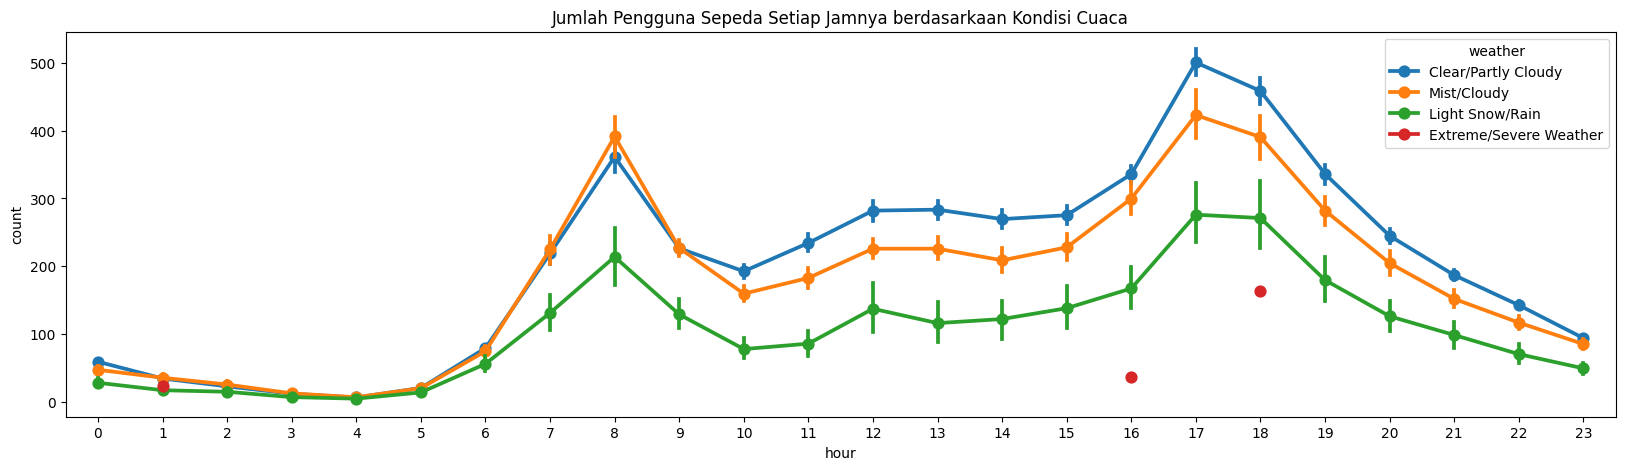

In [234]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour_df, x='hour', y='count', hue='weather')
ax.set(title='Jumlah Pengguna Sepeda Setiap Jamnya berdasarkaan Kondisi Cuaca')

Berdasarkan visualisai data poinplot di atas dapat dijelaskan bahwa cuaca memang memengaruhi orang untuk menggunakan sepeda. Dapat dilihat jika cuaca yang cerah dan cenderung berawan lebih disukai pengguna sepeda dibanding cuaca ketika hujan/bersalju dan cuaca ekstrim. Hal ini didukung jam-jam dengan intensitas cuaca yang cerah (Jam 6 -  9  dan 16 - 19 ) lebih banyak diminati penyewa sepeda. Untuk cuaca ekstrim/berat sangat jarang terjadi, jika dilihat dari gambar terdapat tiga titik cuaca ekstrim yang berada di jam 1, 16, dan 18.

<h3> 2. Apa musim utama yang menjadi musim dengan peminatan sewa sepeda tertinggi? (Spring, Summer, Fall, dan Winter) <h3>


<ipython-input-235-2c5212891b14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_df, x='season', y='count', ax=ax, palette='Set2')


[Text(0.5, 1.0, 'Jumlah Pengguna Sepeda berdasarkan Musim')]

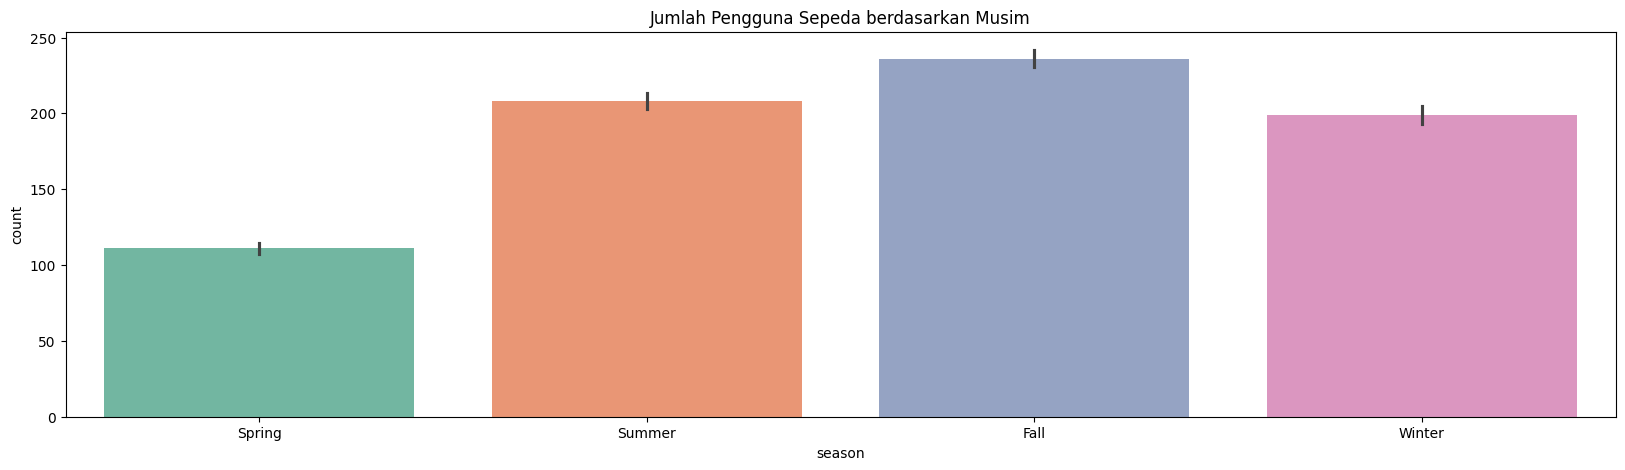

In [235]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=hour_df, x='season', y='count', ax=ax, palette='Set2')
ax.set(title='Jumlah Pengguna Sepeda berdasarkan Musim')

Berdasarkan visualisasi data barplot di atas dapat dijelaskan bahwa ketika musim gugur (fall) lebih diminati orang-orang untuk menggunakan sepeda disusul oleh musim panas (summer) yang tidak berbeda jauh.

<h3>3. Bagaimana hubungan antara pengguna registered dan casual dalam penggunaan saat weekday, holiday, dan workingday? <h3>


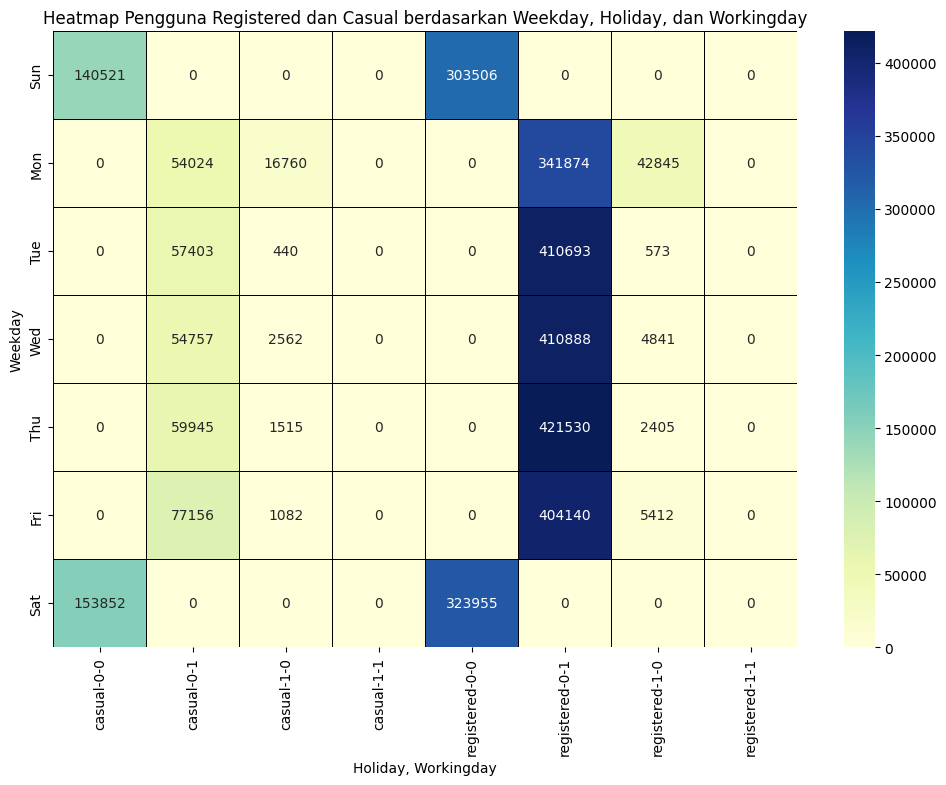

In [236]:
pivot_table = hour_df.pivot_table(index='weekday', columns=['holiday', 'workingday'], values=['registered', 'casual'], aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5, linecolor='black')

plt.title('Heatmap Pengguna Registered dan Casual berdasarkan Weekday, Holiday, dan Workingday')
plt.xlabel('Holiday, Workingday')
plt.ylabel('Weekday')

plt.show()

Berdasarkan visualisai heatmap correlation dapat dijelaskan melalui beberapa poin, yaitu


* Jika suatu hari adalah hari libur (holiday = 1) dan bukan hari kerja (workingday = 0), itu berarti itu adalah hari libur yang jatuh pada akhir pekan (Sabtu atau Minggu).

* Jika suatu hari adalah hari libur (holiday = 1) dan juga hari kerja (workingday = 1), itu berarti itu adalah hari libur yang jatuh pada hari kerja biasa (bukan akhir pekan).

* Jika suatu hari bukan hari libur (holiday = 0) dan juga hari kerja (workingday = 1), itu berarti itu adalah hari kerja biasa yang bukan hari libur.

* Jika suatu hari bukan hari libur (holiday = 0) dan bukan hari kerja (workingday = 0), itu berarti itu adalah akhir pekan (Sabtu atau Minggu) yang bukan hari libur.









<h3>4. Apakah temperatur berpengaruh terhadap pengunaan sepeda pada jam-jam tertentu? <h3>

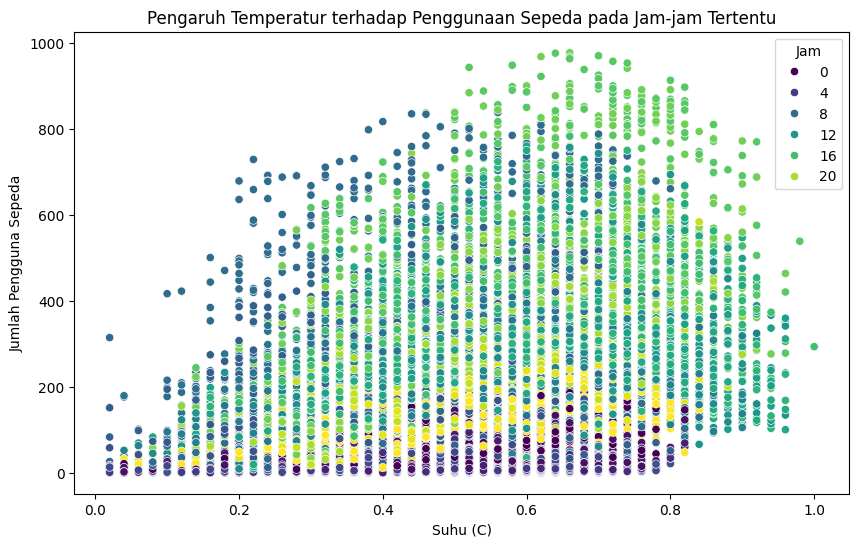

In [237]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour_df, x='temp', y='count', hue='hour', palette='viridis')
plt.title('Pengaruh Temperatur terhadap Penggunaan Sepeda pada Jam-jam Tertentu')
plt.xlabel('Suhu (C)')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.legend(title='Jam')
plt.show()


Berdasarkan visualisasi data scatterplot di atas dapat dijelaskan sebagai berikut:



1. Terlihat bahwa penggunaan sepeda cenderung meningkat dengan meningkatnya suhu. Ini dapat mengindikasikan bahwa cuaca yang lebih hangat lebih mendorong orang untuk menggunakan sepeda.
2. Hal ini juga didukung oleh fakta bahwa di jam-jam terpanas (sekitar jam 14:00 - 17:00), penggunaan sepeda mencapai puncaknya. Ini bisa menjadi hasil dari kondisi cuaca yang nyaman untuk bersepeda.




## Conclusion



1.   Pada pertanyaan 1 dapat disimpulkan bahwa cuaca memang memiliki pengaruh signifikan terhadap keputusan pengguna untuk menggunakan sepeda. Cuaca yang cerah dan cenderung berawan cenderung lebih disukai oleh pengguna sepeda, dibandingkan dengan cuaca yang hujan atau bersalju, atau bahkan cuaca ekstrim. Hal ini terbukti dengan adanya lonjakan aktivitas penyewaan sepeda pada jam-jam tertentu ketika cuaca terang (sekitar Jam 6 hingga 9 pagi dan Jam 16 hingga 19 sore), yang menunjukkan bahwa pengguna sepeda lebih memilih untuk bersepeda pada saat cuaca dalam kondisi yang menyenangkan. Analisis ini juga mengungkapkan bahwa cuaca ekstrim atau berat sangat jarang terjadi, yang tercermin dari sedikitnya titik data yang tercatat untuk cuaca ekstrim dalam rentang jam tertentu. Meskipun demikian, adanya titik data cuaca ekstrim pada jam 1 siang serta pada Jam 16 dan 18 sore menunjukkan bahwa ada kecenderungan bagi beberapa pengguna sepeda untuk tetap menggunakan sepeda meskipun cuaca tidak mendukung. Ini bisa diinterpretasikan sebagai indikasi bahwa sebagian pengguna sepeda memiliki komitmen yang kuat terhadap kegiatan bersepeda mereka, meskipun dihadapkan dengan kondisi cuaca yang tidak ideal.


2.   Pada pertanyaan 2 dapat disimpulkan bahwa preferensi pengguna sepeda cenderung berubah-ubah sepanjang musim. Dapat dilihat bahwa musim gugur (fall) menjadi musim yang paling diminati oleh orang-orang untuk menggunakan sepeda, diikuti oleh musim panas (summer) yang juga menarik minat yang signifikan. Fenomena ini mungkin terkait dengan perubahan kondisi cuaca dan lingkungan selama musim tersebut. Misalnya, musim gugur sering kali memberikan kondisi cuaca yang sejuk dan nyaman bagi pengguna sepeda, sementara musim panas menawarkan hari-hari cerah dan panas yang ideal untuk bersepeda di luar ruangan. Faktor-faktor seperti panjangnya hari, kejernihan udara, dan keindahan alam selama musim tersebut juga dapat berperan dalam menarik minat pengguna sepeda.


3. Pada pertanyaan 3 dapat disimpulkan bahwa Pengguna casual lebih banyak menyewa sepeda pada saat bukan hari kerja (Sabtu dan Minggu) dibanding saat hari kerja (Senin - Jumat). Di mana perbandingannya cukup jauh, yaitu dua kali lebih banyak dari hari kerja.
Pengguna registered lebih banyak menyewa sepeda saat hari kerja dibanding hari libur. Namun, perbedaannya tidak terlalu jauh tidak seperti pengguna casual.
Pengguna casual dan registered sama-sama jarang menyewa sepeda di saat hari libur nasional pada akhir pekan (Sabtu - Minggu)
Pengguna casual dan registered sama-sama tidak menyewa sepeda di saat hari libur nasional pada hari biasa (Senin - Jumat)


4. Pada pertanyaan 4 dapat disimpulkan bahwa ada kecenderungan penggunaan sepeda yang meningkat seiring dengan peningkatan suhu. Hal ini dapat diartikan bahwa cuaca yang lebih hangat cenderung mendorong orang untuk lebih aktif menggunakan sepeda. Observasi ini juga diperkuat oleh fakta bahwa pada jam-jam yang tergolong sebagai jam-jam terpanas dalam sehari, khususnya sekitar pukul 14:00 hingga 17:00, penggunaan sepeda mencapai puncaknya. Hal ini kemungkinan besar disebabkan oleh kondisi cuaca yang lebih nyaman dan mendukung untuk bersepeda pada saat tersebut, seperti suhu yang hangat namun tidak terlalu panas, serta cahaya matahari yang menyenangkan untuk aktivitas di luar ruangan. Dengan demikian, data ini menunjukkan bahwa faktor suhu memainkan peran penting dalam memengaruhi tingkat aktivitas bersepeda masyarakat, dengan cuaca yang lebih hangat cenderung menjadi dorongan untuk bersepeda yang lebih aktif.







<h3>